In [1]:
#This is the first installment of a series in individual linear regressions between several dozen questions from the
#WVS Database dataset from 2017-2022 on world values and the measures of democracy via an index provided by the Global 
#State of Democracy indexes.

#Load in democracy dataset first
import pandas as pd

# Load the excel file
rep_gov_IDEA = pd.read_excel('Representative_Government_IDEA.xlsx')

# Display the first few rows of the DataFrame
print(rep_gov_IDEA.head())

   Year Country name  Representative Government Score  \
0  2021  Afghanistan                             0.00   
1  2021      Albania                             0.64   
2  2021      Algeria                             0.37   
3  2021       Angola                             0.42   
4  2021    Argentina                             0.87   

   Fundamental Rights Score  Checks on Government Score  \
0                      0.31                        0.24   
1                      0.69                        0.58   
2                      0.51                        0.44   
3                      0.49                        0.44   
4                      0.62                        0.65   

   Impartial Adminstration Score  Total Democracy Index  
0                           0.49                 0.2600  
1                           0.36                 0.5675  
2                           0.39                 0.4275  
3                           0.44                 0.4475  
4           

/Users/ryantanner/WorldsofBelief


In [2]:
#Load in world value dataset second
import pandas as pd

# Load the excel file
Q2_Friends = pd.read_excel('Important_in_life_Friends.xls', skiprows = 6)

# Display the first few rows of the DataFrame
print(Q2_Friends.head())

             Unnamed: 0      Unnamed: 1  Albania  Andorra  Azerbaijan  \
0        Very important  45.4% (69,952)     36.0     54.9        26.1   
1      Rather important  43.3% (66,614)     55.2     37.5        59.7   
2    Not very important   9.5% (14,594)      7.5      6.9        10.8   
3  Not at all important    1.5% (2,263)      1.0      0.8         2.6   
4            Don't know      0.1% (191)      0.1      0.0         0.7   

   Argentina  Australia  Austria  Bangladesh  Armenia  ...  Tunisia  Turkey  \
0       51.9       52.4     60.1        25.2     42.9  ...     47.0    61.7   
1       37.2       40.0     34.9        49.3     43.2  ...     35.8    34.9   
2        8.5        5.1      4.5        18.3     11.8  ...     12.7     2.9   
3        2.4        0.3      0.3         6.8      2.1  ...      4.3     0.4   
4        0.0        0.0      0.1         0.1      0.1  ...      0.2     0.1   

   Ukraine  North Macedonia  Egypt  Great Britain  United States  Uruguay  \
0     33.

In [3]:
#Scaling proportions from 0 to 100 to 0 to 1 to allow for direct comparison

# Get all columns except the first two
cols_to_scale = Q2_Friends.columns[2:]

# Scale columns 3 to 92 and rows 0 to 7
Q2_Friends.loc[:7, cols_to_scale] = Q2_Friends.loc[:7, cols_to_scale] / 100

# Display the first few rows of the DataFrame
print(Q2_Friends.head())

             Unnamed: 0      Unnamed: 1  Albania  Andorra  Azerbaijan  \
0        Very important  45.4% (69,952)    0.360    0.549       0.261   
1      Rather important  43.3% (66,614)    0.552    0.375       0.597   
2    Not very important   9.5% (14,594)    0.075    0.069       0.108   
3  Not at all important    1.5% (2,263)    0.010    0.008       0.026   
4            Don't know      0.1% (191)    0.001    0.000       0.007   

   Argentina  Australia  Austria  Bangladesh  Armenia  ...  Tunisia  Turkey  \
0      0.519      0.524    0.601       0.252    0.429  ...    0.470   0.617   
1      0.372      0.400    0.349       0.493    0.432  ...    0.358   0.349   
2      0.085      0.051    0.045       0.183    0.118  ...    0.127   0.029   
3      0.024      0.003    0.003       0.068    0.021  ...    0.043   0.004   
4      0.000      0.000    0.001       0.001    0.001  ...    0.002   0.001   

   Ukraine  North Macedonia  Egypt  Great Britain  United States  Uruguay  \
0    0.33

In [4]:
#Checking for missing values in the datasets

# Checking for missing values in Q1_Family
missing_values_Q2_Friends = Q2_Friends.isnull().sum()
print("Missing values in Q1_Family:\n", missing_values_Q2_Friends)

# Checking for missing values in rep_gov_IDEA
missing_values_rep_gov_IDEA = rep_gov_IDEA.isnull().sum()
print("\nMissing values in rep_gov_IDEA:\n", missing_values_rep_gov_IDEA)

Missing values in Q1_Family:
 Unnamed: 0          0
Unnamed: 1          0
Albania             0
Andorra             0
Azerbaijan          0
                   ..
Great Britain       0
United States       0
Uruguay             0
Venezuela           0
Northern Ireland    0
Length: 92, dtype: int64

Missing values in rep_gov_IDEA:
 Year                               0
Country name                       0
Representative Government Score    0
Fundamental Rights Score           0
Checks on Government Score         0
Impartial Adminstration Score      0
Total Democracy Index              0
dtype: int64


In [5]:
#Transposing the Q1_Family dataframe to prepare it for a merge with rep_gov_idea

# Drop the first two columns and 8th row
Q2_Friends = Q2_Friends.drop(Q2_Friends.columns[[0, 1]], axis=1)
Q2_Friends = Q2_Friends.drop(Q2_Friends.index[7])

# Transpose the DataFrame
Q2_Friends_T = Q2_Friends.transpose()

# Reset the index
Q2_Friends_T.reset_index(inplace=True)

# Rename the columns
Q2_Friends_T.columns = ['Country name', 'Very important', 'Rather important', 'Not very important', 
                       'Not at all important', "Don't know", "No answer", 'Other or missing']
print(Q2_Friends_T)

print(Q2_Friends.shape)

        Country name  Very important  Rather important  Not very important  \
0            Albania           0.360             0.552               0.075   
1            Andorra           0.549             0.375               0.069   
2         Azerbaijan           0.261             0.597               0.108   
3          Argentina           0.519             0.372               0.085   
4          Australia           0.524             0.400               0.051   
..               ...             ...               ...                 ...   
85     Great Britain           0.592             0.355               0.047   
86     United States           0.507             0.384               0.094   
87           Uruguay           0.468             0.344               0.149   
88         Venezuela           0.358             0.419               0.215   
89  Northern Ireland           0.698             0.267               0.027   

    Not at all important  Don't know  No answer  Other or missi

In [6]:
#Merging the two data frames together
merged_df = pd.merge(Q2_Friends_T, rep_gov_IDEA,  how='inner', left_on=['Country name'], 
                     right_on = ['Country name'])

# Print the merged DataFrame
print(merged_df)

       Country name  Very important  Rather important  Not very important  \
0           Albania           0.360             0.552               0.075   
1        Azerbaijan           0.261             0.597               0.108   
2         Argentina           0.519             0.372               0.085   
3         Australia           0.524             0.400               0.051   
4           Austria           0.601             0.349               0.045   
..              ...             ...               ...                 ...   
73          Ukraine           0.335             0.538               0.100   
74  North Macedonia           0.509             0.400               0.058   
75            Egypt           0.417             0.397               0.137   
76          Uruguay           0.468             0.344               0.149   
77        Venezuela           0.358             0.419               0.215   

    Not at all important  Don't know  No answer  Other or missing  Year  \


In [7]:
#Regression and Pearson Correlation Coefficient Analysis
#Import necessary libraries
import statsmodels.formula.api as smf
import scipy.stats as stats

# Fit the linear regression model
model = smf.ols(formula='Q("Total Democracy Index") ~ Q("Very important")', data=merged_df)
results = model.fit()

# Print out the statistics
print(results.summary())

correlation, _ = stats.pearsonr(merged_df['Total Democracy Index'], merged_df['Very important'])
print('Pearson correlation: %.3f' % correlation)

                                OLS Regression Results                                
Dep. Variable:     Q("Total Democracy Index")   R-squared:                       0.149
Model:                                    OLS   Adj. R-squared:                  0.138
Method:                         Least Squares   F-statistic:                     13.30
Date:                        Mon, 15 May 2023   Prob (F-statistic):           0.000484
Time:                                00:31:23   Log-Likelihood:                 26.096
No. Observations:                          78   AIC:                            -48.19
Df Residuals:                              76   BIC:                            -43.48
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------

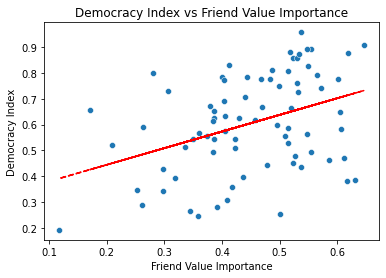

In [8]:
#Visualization of the relationship between family values and democracy
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# create a figure and axis
fig, ax = plt.subplots()

# scatter plot of the data
sns.scatterplot(data=merged_df, x="Very important", y="Total Democracy Index", ax=ax)

# calculate the trendline
x = merged_df["Very important"]
y = merged_df["Total Democracy Index"]
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

# plot trendline
plt.plot(x,p(x),"r--")

# add labels
ax.set_xlabel('Friend Value Importance')
ax.set_ylabel('Democracy Index')
ax.set_title('Democracy Index vs Friend Value Importance')

# show the plot
plt.show()


In [11]:
#Dealing with potential outliers
#Highest value
outlier_country = merged_df[merged_df['Very important'] == merged_df['Very important'].max()]['Country name']
print(outlier_country)

#Lowest value
outlier_country = merged_df[merged_df['Very important'] == merged_df['Very important'].min()]['Country name']
print(outlier_country)

#Since it seems like Myanmar could be an outlier, as evidenced above in the scatterplot, I am going to run some
#statistical tests to see if this is really the case. If so, I will remove Myanmar from the dataset. 
myanmar_data = merged_df[merged_df['Country name'] == 'Myanmar']
print(myanmar_data[['Total Democracy Index', 'Very important']])

#Z-Score to see
from scipy.stats import zscore

merged_df['Z_score_democracy'] = zscore(merged_df['Total Democracy Index'])
merged_df['Z_score_belief'] = zscore(merged_df['Very important'])

myanmar_data = merged_df[merged_df['Country name'] == 'Myanmar']
print(myanmar_data[['Z_score_democracy', 'Z_score_belief']])
#Since Myanmar is not quite a 3 standard deviation outlier, I will keep it in the dataset.

67    Sweden
Name: Country name, dtype: object
10    Myanmar
Name: Country name, dtype: object
    Total Democracy Index  Very important
10                 0.1925           0.118
    Z_score_democracy  Z_score_belief
10          -2.198651       -2.947057


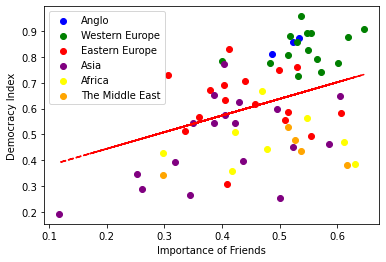

In [12]:
#Now I am going to color label countries by their geographic and cultural association location. There will be six 
#distinctive groups: Anglo, in blue etc; Western Europe, in dark blue; Eastern Europe, in orange; Asia, in green; 
#Africa, in pink; and the Middle East, in purple.

#Creating a dictionary to assign a geographical location to each country
region_dict = {
    'United States': 'Anglo',
    'Great Britain': 'Anglo',
    'France': 'Western Europe',
    'Germany': 'Western Europe',
    'Albania': 'Eastern Europe',
    'Azerbaijan': 'Asia',
    'Argentina': 'South America',
    'Australia': 'Anglo',
    'Austria': 'Western Europe',
    'Bangladesh': 'Asia',
    'Armenia': 'Asia',
    'Bolivia': 'South America',
    'Brazil': 'South America',
    'Bulgaria': 'Eastern Europe',
    'Myanmar': 'Asia',
    'Belarus': 'Eastern Europe',
    'Canada': 'Anglo',
    'Chile': 'South America',
    'China': 'Asia',
    'Colombia': 'South America',
    'Croatia': 'Eastern Europe',
    'Cyprus': 'Western Europe',
    'Czechia': 'Eastern Europe',
    'Denmark': 'Western Europe',
    'Ecuador': 'South America',
    'Ethiopia': 'Africa',
    'Estonia': 'Eastern Europe',
    'Finland': 'Western Europe',
    'France': 'Western Europe',
    'Georgia': 'Asia',
    'Germany': 'Western Europe',
    'Greece': 'Western Europe',
    'Guatemala': 'North America',
    'Hungary': 'Eastern Europe',
    'Iceland': 'Western Europe',
    'Indonesia': 'Asia',
    'Iran': 'The Middle East',
    'Iraq': 'The Middle East',
    'Italy': 'Western Europe',
    'Japan': 'Asia',
    'Kazakhstan': 'Asia',
    'Jordan': 'The Middle East',
    'Kenya': 'Africa',
    'Kyrgyzstan': 'Asia',
    'Lebanon': 'The Middle East',
    'Latvia': 'Eastern Europe',
    'Libya': 'Africa',
    'Malaysia': 'Asia',
    'Maldives': 'Asia',
    'Mexico': 'North America',
    'Mongolia': 'Asia',
    'Montenegro': 'Eastern Europe',
    'Morocco': 'Africa',
    'Netherlands': 'Western Europe',
    'New Zealand': 'Anglo',
    'Nicaragua': 'North America',
    'Nigeria': 'Africa',
    'Norway': 'Western Europe',
    'Pakistan': 'Asia',
    'Peru': 'South America',
    'Philippines': 'Asia',
    'Poland': 'Eastern Europe',
    'Portugal': 'Western Europe',
    'Romania': 'Eastern Europe',
    'Serbia': 'Eastern Europe',
    'Singapore': 'Asia',
    'Slovakia': 'Eastern Europe',
    'Slovenia': 'Eastern Europe',
    'Zimbabwe': 'Africa',
    'Spain': 'Western Europe',
    'Sweden': 'Western Europe',
    'Switzerland': 'Western Europe',
    'Tajikistan': 'Asia',
    'Thailand': 'Asia',
    'Tunisia': 'Africa',
    'Turkey': 'The Middle East',
    'Ukraine': 'Eastern Europe',
    'North Macedonia': 'Eastern Europe',
    'Egypt': 'Africa',
    'Uruguay': 'South America',
    'Venezuela': 'South America'
}

merged_df['Region'] = merged_df['Country name'].map(region_dict)

#Creates a color dictionary for the different regions
color_dict = {
    'Anglo': 'blue',
    'Western Europe': 'green',
    'Eastern Europe': 'red',
    'Asia': 'purple',
    'Africa': 'yellow',
    'The Middle East': 'orange',
}

#Applies the new colored regions to the regression plot
for region, color in color_dict.items():
    bool_mask = merged_df['Region'] == region
    plt.scatter(merged_df.loc[bool_mask, 'Very important'], merged_df.loc[bool_mask, 'Total Democracy Index'], 
                color=color, label=region)

# Draw regression line
z = np.polyfit(merged_df['Very important'], merged_df['Total Democracy Index'], 1)
p = np.poly1d(z)
plt.plot(merged_df['Very important'], p(merged_df['Very important']), "r--")

plt.xlabel('Importance of Friends')
plt.ylabel('Democracy Index')
plt.legend()
plt.show()
